In [113]:
import seaborn as sns
import pandas as pd
import pathlib
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sp

from ast import literal_eval


In [114]:
# path = pathlib.Path(r'data\presolves\cartpole_DIRCOL_10000.csv')
# path = pathlib.Path(r'data\presolves\cartpole_DIRCOL_1000_pi_wrap_fix.csv')
path = pathlib.Path(r'data\presolves\cartpole_DIRCOL_1000.csv')


df = pd.read_csv(path)

In [115]:
df.head()

,params,X,U,obj,solve_time_sec,term_status
0,"[0.26844767519656987, 1.3839186900429339]","[[0.26844767519656987, 1.3839186900429339, 9.2...","[[-204.57308929751585], [70.25422099890474], [...",3077.531944,0.273,LOCALLY_SOLVED
1,"[0.17395869456806734, -0.3284437342437001]","[[0.17395869456806734, -0.3284437342437001, 0....","[[8.35467803696561], [3.6969270040664144], [0....",174.914811,1.233,LOCALLY_SOLVED
2,"[-0.18675604419248137, 0.5106810172392668]","[[-0.18675604419248137, 0.5106810172392668, 0....","[[5.207184255483652], [1.156980262174639], [-0...",203.211216,0.672,LOCALLY_SOLVED
3,"[0.0860221243068029, -1.407015164375847]","[[0.0860221243068029, -1.407015164375847, 0.0,...","[[2.4207920643963012], [2.337804939863343], [0...",171.091551,1.506,LOCALLY_SOLVED
4,"[-0.23136043145504903, -1.228768805583758]","[[-0.23136043145504903, -1.228768805583758, 0....","[[4.380622885045079], [3.388378557016715], [0....",167.473664,0.374,LOCALLY_SOLVED


## Visualize Convergence

In [116]:
df['term_status']

# Import dataset and convert string lists into np arrays
array_elements = ['params', 'X', 'U']
for elem in array_elements:
    df[elem] = df[elem].apply(literal_eval) # Convert strings into lists 
    df[elem] = df[elem].apply(lambda x: np.array(x, dtype=np.float64)) # Convert lists into np arrays of type np.float64


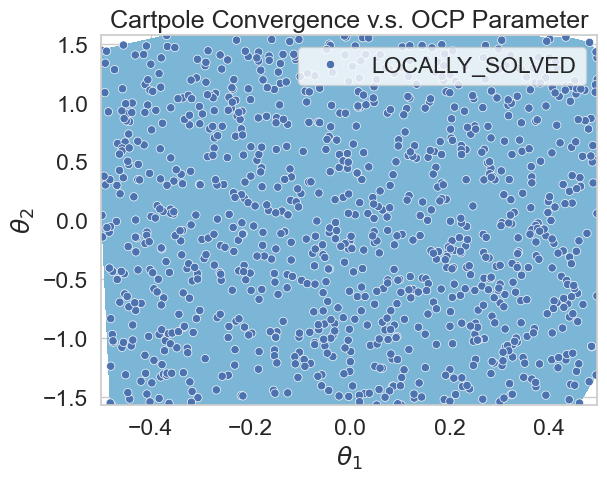

In [117]:

df = df.head(1000)
params = df['params'].to_numpy()
# print(params)
params = np.vstack(params)



sns.set_theme(font_scale=1.5, style="whitegrid")
# df['term_status'] = np.where(np.random.rand(len(df)) < 0.5, 'LOCALLY_SOLVED', df['term_status'])
df["term_status_binary"] = df['term_status'].map({'LOCALLY_SOLVED': 1, 'LOCALLY_INFEASIBLE': 0})
plt.tricontourf(params[:, 0], params[:, 1], df["term_status_binary"], levels=np.array([0, 0.5, 1.1]), cmap='RdBu')
sns.scatterplot(x=params[:, 0], y=params[:, 1], style=df['term_status'], hue=df['term_status']) 
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\theta_2$')
plt.title('Cartpole Convergence v.s. OCP Parameter')
plt.legend(loc='upper right')
plt.show()


# df["term_status_binary"] = df['term_status'].map({'LOCALLY_SOLVED': 1, 'LOCALLY_INFEASIBLE': 0})
# df.head(10)

# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Scatter Plot')
# plt.show()


## Visualize Value Function

<Axes: >

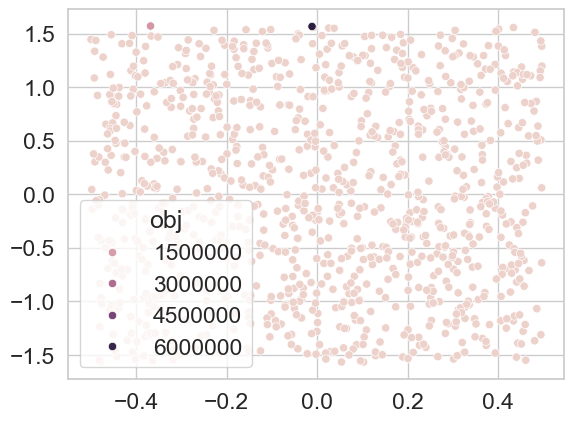

In [118]:
sns.scatterplot(x=params[:, 0], y=params[:, 1], hue=df['obj'])


### Examine the distribution of solve times

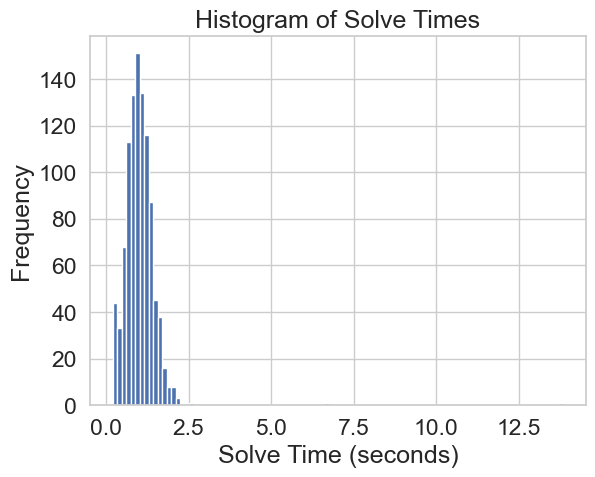

NormaltestResult(statistic=1785.3747493453984, pvalue=0.0)

In [119]:
df["solve_time_sec"]

plt.hist(df["solve_time_sec"], bins=100)
plt.xlabel("Solve Time (seconds)")
plt.ylabel("Frequency")
plt.title("Histogram of Solve Times")
plt.show()

sp.stats.normaltest(df["solve_time_sec"])

solve_time_sec                        1.02775
1reg_warmstarted_solve_time_sec       1.71540
0-1reg_warmstarted_solve_time_sec     0.38625
0-01reg_warmstarted_solve_time_sec    0.38800
warmstarted_solve_time_sec            0.32015
dtype: float64


,solve_time_sec,1reg_warmstarted_solve_time_sec,0-1reg_warmstarted_solve_time_sec,0-01reg_warmstarted_solve_time_sec,warmstarted_solve_time_sec
0,1.046,NaN,NaN,NaN,NaN
1,1.752,NaN,NaN,NaN,NaN
2,0.622,NaN,NaN,NaN,NaN
3,0.261,NaN,NaN,NaN,NaN
4,1.194,NaN,NaN,NaN,NaN


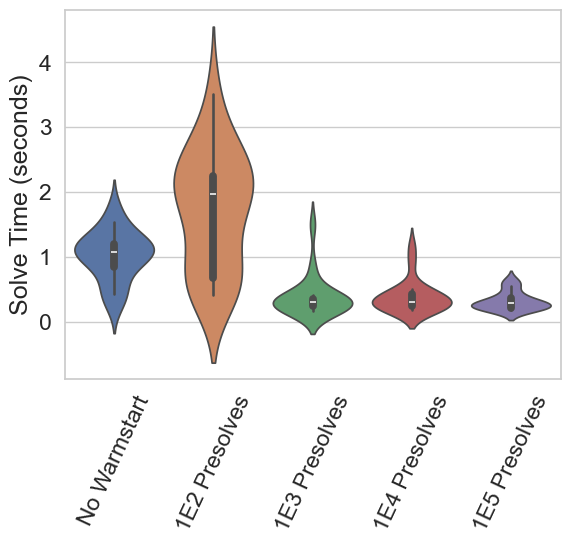

In [128]:
### 0 reg
path = pathlib.Path(r'data\NLP_refinement\cartpole_100_no_reg.csv')
df = pd.read_csv(path)
combined_df = df[['solve_time_sec']]

### 1 reg
path = pathlib.Path(r'data\NLP_refinement\cartpole_100_1reg.csv')
df = pd.read_csv(path)
df = df.rename(columns={'warmstarted_solve_time_sec': '1reg_warmstarted_solve_time_sec'})
# df.head(2)
# combined_df = pd.concat([combined_df, df['1reg_warmstarted_solve_time_sec']])
combined_df = pd.concat([combined_df, df[['1reg_warmstarted_solve_time_sec']]])


### 0.1 reg
path = pathlib.Path(r'data\NLP_refinement\cartpole_100_0-1reg.csv')
df = pd.read_csv(path)
df = df.rename(columns={'warmstarted_solve_time_sec': '0-1reg_warmstarted_solve_time_sec'})

combined_df = pd.concat([combined_df, df['0-1reg_warmstarted_solve_time_sec']])

### 0.01 reg
path = pathlib.Path(r'data\NLP_refinement\cartpole_100_0-01reg.csv')
df = pd.read_csv(path)
df = df.rename(columns={'warmstarted_solve_time_sec': '0-01reg_warmstarted_solve_time_sec'})
# df.head(2)
combined_df = pd.concat([combined_df, df['0-01reg_warmstarted_solve_time_sec']])


### 0 reg
path = pathlib.Path(r'data\NLP_refinement\cartpole_100_no_reg.csv')
df = pd.read_csv(path)
# combined_df = df[['solve_time_sec', 'warmstarted_solve_time_sec']]
combined_df =  pd.concat([combined_df, df[['warmstarted_solve_time_sec']]])


column_averages = combined_df.mean()
print(column_averages)


sns.violinplot(data=combined_df, bw_method="silverman")

# plt.xlabel('Number of Presolve Samples')
plt.ylabel('Solve Time (seconds)')

# plt.xticks([0, 1, 2, 3, 4], ['Naive Interpolation', r'$\lambda = 0$', r'$\lambda = 1$', r'$\lambda = 0.1$', r'$\lambda = 0.01$'])
# plt.xticks([0, 1, 2, 3, 4], [r'$\lambda = 0$', r'$\lambda = 1E0$', r'$\lambda = 1E-1$', r'$\lambda = 1E-2$', r'$\lambda = 1E-3$'])
plt.xticks([0, 1, 2, 3, 4], ['No Warmstart', '1E2 Presolves', '1E3 Presolves', '1E4 Presolves', '1E5 Presolves'])

plt.xticks(rotation=65)
# sns.violinplot(x=df['warmstarted_solve_time_sec'])
combined_df.head(5)